In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from typing import TypedDict
from dotenv import load_dotenv
import os

load_dotenv()

True

In [ ]:
llm = HuggingFaceEndpoint(
    repo_id="openai/gpt-oss-20b",
    task="task-generation",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN")
)

llm = ChatHuggingFace(llm=llm)


/mnt/d/Academics/Generative AI by CampusX/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanantion: str

In [4]:
def generate_joke(state: JokeState):
    prompt = f"Generate a funny joke on the topic {state['topic']}"
    response = llm.invoke(prompt)

    return {'joke': response}

In [5]:
def generate_explanation(state: JokeState):
    prompt =f"Write am explanation for the joke: {state['joke']}"
    response = llm.invoke(prompt)

    return {'explanation': response}

In [6]:
graph = StateGraph(JokeState)

# add nodes
graph.add_node(generate_joke, generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# add edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', "generate_explanation")
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

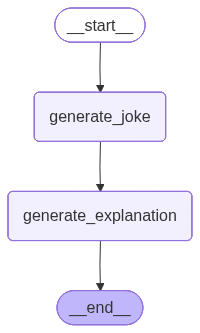

In [7]:
workflow

In [8]:
config = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic': 'Chatgpt'}, config=config)

{'topic': 'Chatgpt',
 'joke': AIMessage(content='Why did ChatGPT get a ticket on the highway?\n\nBecause it kept *predicting* every turn and accidentally *re‑routed* the whole conversation! 🚦😂', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 81, 'total_tokens': 146}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--5aa88eac-94e6-4ed6-8b34-b03faed1e3b9-0', usage_metadata={'input_tokens': 81, 'output_tokens': 65, 'total_tokens': 146})}

In [9]:
workflow.get_state(config)  # final state value

StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did ChatGPT get a ticket on the highway?\n\nBecause it kept *predicting* every turn and accidentally *re‑routed* the whole conversation! 🚦😂', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 81, 'total_tokens': 146}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--5aa88eac-94e6-4ed6-8b34-b03faed1e3b9-0', usage_metadata={'input_tokens': 81, 'output_tokens': 65, 'total_tokens': 146})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-365c-6884-8002-1579cc459882'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:22:52.828217+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-138f-662b-8001-97095801ac20'}}, tasks=(), interrupts=())

In [10]:
workflow.get_state_history(config)  # Intermediate state value

<generator object Pregel.get_state_history at 0x788c47eb5220>

In [11]:
state_history = workflow.get_state_history(config)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did ChatGPT get a ticket on the highway?\n\nBecause it kept *predicting* every turn and accidentally *re‑routed* the whole conversation! 🚦😂', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 81, 'total_tokens': 146}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--5aa88eac-94e6-4ed6-8b34-b03faed1e3b9-0', usage_metadata={'input_tokens': 81, 'output_tokens': 65, 'total_tokens': 146})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-365c-6884-8002-1579cc459882'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:22:52.828217+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-138f-662b-8001-97095801ac20'}}, tasks=(), interrupts=())
Step 1 state: Stat

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic': 'Google DeepMind'}, config=config2)

{'topic': 'Google DeepMind',
 'joke': AIMessage(content='Why did Google DeepMind go to therapy?\n\nBecause it kept getting stuck in “feedback loops” and couldn’t stop re‑training its own emotions!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 81, 'total_tokens': 269}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9e1bfbdc-984d-4af7-884a-d8f2e03c5801-0', usage_metadata={'input_tokens': 81, 'output_tokens': 188, 'total_tokens': 269})}

In [13]:
workflow.get_state(config2)  # final state value

StateSnapshot(values={'topic': 'Google DeepMind', 'joke': AIMessage(content='Why did Google DeepMind go to therapy?\n\nBecause it kept getting stuck in “feedback loops” and couldn’t stop re‑training its own emotions!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 81, 'total_tokens': 269}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9e1bfbdc-984d-4af7-884a-d8f2e03c5801-0', usage_metadata={'input_tokens': 81, 'output_tokens': 188, 'total_tokens': 269})}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-70cf-6b8b-8002-80d1b68e3c79'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:22:58.957175+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-507c-6fc0-8001-14d6abb5e119'}}, tasks=(), interrupts=())

In [14]:
state_history = workflow.get_state_history(config2)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Google DeepMind', 'joke': AIMessage(content='Why did Google DeepMind go to therapy?\n\nBecause it kept getting stuck in “feedback loops” and couldn’t stop re‑training its own emotions!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 188, 'prompt_tokens': 81, 'total_tokens': 269}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--9e1bfbdc-984d-4af7-884a-d8f2e03c5801-0', usage_metadata={'input_tokens': 81, 'output_tokens': 188, 'total_tokens': 269})}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-70cf-6b8b-8002-80d1b68e3c79'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:22:58.957175+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098674-507c-6fc0-8001-14d6abb5e119'}}, tasks=(), interrupts=())
Step 1 state

## Time Travel

In [36]:
workflow.get_state({"configurable": {'thread_id': "1", 'checkpoint_id': '1f09863f-f519-6ad0-8000-c10ece930ff0'}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f09863f-f519-6ad0-8000-c10ece930ff0'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [21]:
workflow.invoke(None, {"configurable": {'thread_id': "1", 'checkpoint_id': "1f098673-fae6-646d-bfff-a27a5e5993dd"}})


{'topic': 'Chatgpt',
 'joke': AIMessage(content='Why did the user break up with ChatGPT?\n\nBecause every time they tried to say “I’m hungry,” it kept replying “I’ve got a byte to eat!”', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 81, 'total_tokens': 150}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--8ccca2a7-84ea-485d-97b6-ef99e40bd1bf-0', usage_metadata={'input_tokens': 81, 'output_tokens': 69, 'total_tokens': 150})}

In [22]:
workflow.get_state(config)  # final state value

StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did the user break up with ChatGPT?\n\nBecause every time they tried to say “I’m hungry,” it kept replying “I’ve got a byte to eat!”', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 81, 'total_tokens': 150}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--8ccca2a7-84ea-485d-97b6-ef99e40bd1bf-0', usage_metadata={'input_tokens': 81, 'output_tokens': 69, 'total_tokens': 150})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f09868f-048d-6575-8002-882417145846'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:34:52.381004+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f09868e-e93f-6832-8001-879806410d8b'}}, tasks=(), interrupts=())

In [25]:
state_history = workflow.get_state_history(config)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Chatgpt', 'joke': AIMessage(content='Why did the user break up with ChatGPT?\n\nBecause every time they tried to say “I’m hungry,” it kept replying “I’ve got a byte to eat!”', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 81, 'total_tokens': 150}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--8ccca2a7-84ea-485d-97b6-ef99e40bd1bf-0', usage_metadata={'input_tokens': 81, 'output_tokens': 69, 'total_tokens': 150})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f09868f-048d-6575-8002-882417145846'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:34:52.381004+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f09868e-e93f-6832-8001-879806410d8b'}}, tasks=(), interrupts=())
Step 1 state: StateSnapsh

In [34]:
workflow.update_state({"configurable": {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098673-fae6-646d-bfff-a27a5e5993dd'}},{'topic': 'Claude'})
# workflow.update_state(
#     {
#         "configurable": {
#             "thread_id": "1",
#             "checkpoint_ns": "",
#             "checkpoint_id": "1f098673-fae6-646d-bfff-a27a5e5993dd"
#         }
#     },
#     {"topic": "Claude"}
# )


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0986a8-2118-62bc-8000-8d608a9fb878'}}

In [35]:
state_history = workflow.get_state_history(config)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Claude'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0986a8-2118-62bc-8000-8d608a9fb878'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-09-23T10:46:06.462554+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f098673-fae6-646d-bfff-a27a5e5993dd'}}, tasks=(PregelTask(id='630b892e-9184-6fbb-3bb0-ee27f9e1ebc7', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=())
Step 1 state: StateSnapshot(values={'topic': 'Claude'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0986a4-511b-64ba-8000-6bd4aaf373f0'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-09-23T10:44:24.122872+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoin

In [42]:
workflow.invoke(None, {"configurable": {'thread_id': '1', 'checkpoint_id': '1f0986a8-2118-62bc-8000-8d608a9fb878'}})

{'topic': 'Claude',
 'joke': AIMessage(content='Why did Claude the AI keep a diary?\n\nBecause every time it tried to *think* its thoughts were “Claude”‑able—so it needed a backup to keep the *Claude* manuscript from getting lost in the cloud!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 79, 'total_tokens': 236}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--e5371cb0-e270-4994-88be-3228b9558507-0', usage_metadata={'input_tokens': 79, 'output_tokens': 157, 'total_tokens': 236})}

In [43]:
state_history = workflow.get_state_history(config)
for i, state in enumerate(state_history):
    print(f"Step {i} state: {state}")

Step 0 state: StateSnapshot(values={'topic': 'Claude', 'joke': AIMessage(content='Why did Claude the AI keep a diary?\n\nBecause every time it tried to *think* its thoughts were “Claude”‑able—so it needed a backup to keep the *Claude* manuscript from getting lost in the cloud!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 79, 'total_tokens': 236}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--e5371cb0-e270-4994-88be-3228b9558507-0', usage_metadata={'input_tokens': 79, 'output_tokens': 157, 'total_tokens': 236})}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0986b6-e128-65e3-8002-76f1db10553a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-23T10:52:42.411431+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0986b6-c47a-6696-8001-c9b3061

Great question 🙂 — “time travel” in **LangGraph** basically means jumping back to a **previous checkpoint** in your workflow’s execution and resuming from there, instead of always starting fresh.

LangGraph supports this through its **checkpointers** (like MemorySaver, Redis, Postgres, etc.), which store execution state snapshots.

---

## 🔑 Key Concepts for Time Travel

1. **Checkpoints**
   Each step of a workflow execution can be persisted as a checkpoint:

   * Contains state values (`inputs`, `outputs`, intermediate steps).
   * Identified by a `checkpoint_id`.

2. **Thread IDs**

   * You can run multiple independent conversations (or workflows) with the same graph.
   * Each has a `thread_id`.
   * This makes it easy to “branch” — like version control for conversations.

3. **Resuming (time travel)**

   * To “travel back,” you fetch an **earlier checkpoint** and resume execution from there.
   * This lets you replay the workflow as if you were at that point in time.

---

## ⚙️ Example: Time Travel with MemorySaver

```python
from langgraph.checkpoint.memory import MemorySaver

# Create a checkpointer
checkpointer = MemorySaver()

# Build workflow with checkpointer
workflow = my_workflow.compile(checkpointer=checkpointer)

# Run once
result = workflow.invoke({"topic": "ChatGPT"}, config={"configurable": {"thread_id": "1"}})

# View history
history = workflow.get_state_history(config={"configurable": {"thread_id": "1"}})
for step in history:
    print(step.metadata, step.values)

# Pick an earlier checkpoint
checkpoint_id = history[2].config["configurable"]["checkpoint_id"]

# Resume from there
resumed = workflow.invoke(
    None,   # no new input needed, resumes from checkpoint
    config={"configurable": {"thread_id": "1", "checkpoint_id": checkpoint_id}}
)

print(resumed)
```

---

## 🚀 What this gives you

* You can “rewind” to any point.
* You can branch from a past checkpoint (like `git checkout -b`).
* Useful for experiments:

  * Change model parameters.
  * Inject new state (`workflow.update_state`).
  * Explore “what if” paths without restarting.

---



Perfect 🚀 Let’s build a **mini notebook example** that shows *time travel in LangGraph* — you’ll see how we can run a workflow, rewind to a checkpoint, and branch off in a different direction.

---

## 📝 Notebook Example: Time Travel with LangGraph

```python
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

# 1. Define the state type
from typing import TypedDict

class State(TypedDict):
    topic: str
    joke: str
    explanation: str

# 2. Define nodes
def set_topic(state: State):
    return {"topic": "ChatGPT"}

def tell_joke(state: State):
    return {"joke": f"Why did the human ask {state['topic']} for a recipe for a good laugh? Because its punchlines are well-trained!"}

def explain(state: State):
    return {"explanation": f"The joke is about {state['topic']}. It plays on AI being trained with data."}

# 3. Build workflow
graph = StateGraph(State)
graph.add_node("set_topic", set_topic)
graph.add_node("tell_joke", tell_joke)
graph.add_node("explain", explain)

graph.set_entry_point("set_topic")
graph.add_edge("set_topic", "tell_joke")
graph.add_edge("tell_joke", END)

workflow = graph.compile(checkpointer=MemorySaver())

# 4. Run workflow (Thread 1)
config = {"configurable": {"thread_id": "1"}}
result = workflow.invoke({}, config=config)
print("First run:", result)

# 5. Get state history
history = workflow.get_state_history(config=config)
for i, snapshot in enumerate(history):
    print(f"\nStep {i} | checkpoint_id={snapshot.config['configurable']['checkpoint_id']}")
    print("Values:", snapshot.values)

# 6. Time travel: rewind to after topic was set
checkpoint_id = history[1].config["configurable"]["checkpoint_id"]

# 7. Resume from checkpoint, but branch differently (topic -> explanation instead of joke)
branch_graph = StateGraph(State)
branch_graph.add_node("set_topic", set_topic)
branch_graph.add_node("explain", explain)

branch_graph.set_entry_point("set_topic")
branch_graph.add_edge("set_topic", "explain")
branch_workflow = branch_graph.compile(checkpointer=workflow.checkpointer)

resumed = branch_workflow.invoke(
    None,
    config={"configurable": {"thread_id": "1", "checkpoint_id": checkpoint_id}}
)

print("\nResumed branch:", resumed)
```

---

## 🔍 What happens here:

1. First run → `set_topic → tell_joke`

   * You get a joke about ChatGPT.
2. View history → see checkpoints (`set_topic`, `tell_joke`).
3. “Rewind” to checkpoint after `set_topic`.
4. Create a *branch workflow* (`set_topic → explain`).
5. Resume → instead of telling a joke, it explains ChatGPT.

---



In LangGraph, *time travel* means you can **rewind or branch the execution of a graph to a previous checkpoint**, explore alternate paths, or re-run from an earlier state. This is possible because LangGraph automatically persists **checkpoints** of the workflow state.

---

## 🔑 Key Concepts for Time Travel

1. **Checkpointing**
   Every time a node executes, LangGraph saves a checkpoint (including input, output, and state).

2. **Thread ID**
   Identifies a conversation/workflow session (like a chat thread).

3. **Checkpoint ID**
   Each saved state has a unique ID. By reloading this ID, you can “jump back” to that point.

---

## 🛠️ Example Workflow

```python
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.prebuilt import create_openai_agent
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState

# Store checkpoints in SQLite
memory = SqliteSaver.from_conn_string(":memory:")

# Example LLM agent
model = ChatOpenAI(model="gpt-4o-mini")

workflow = create_openai_agent(model, tools=[], checkpointer=memory)
```

---

## 🚀 Run and Save State

```python
# Run with thread_id = "1"
config = {"configurable": {"thread_id": "1"}}

# First message
workflow.invoke({"messages": [("user", "Hello!")]}, config)
```

This creates **checkpoint 1**.

```python
# Second message
workflow.invoke({"messages": [("user", "Tell me a joke")]} , config)
```

This creates **checkpoint 2**.

---

## ⏪ Time Travel (Rewind to Checkpoint 1)

```python
# List history
for state in workflow.get_state_history(config):
    print(state.config["configurable"]["checkpoint_id"], state.values)

# Pick checkpoint_id from output
checkpoint_id = "1f098673-fae6-646d-bfff-a27a5e5993dd"

# Reload state at checkpoint 1
state = workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": checkpoint_id}})
print("Rewound state:", state.values)
```

Now you’re back in **checkpoint 1’s state**.

---

## 🌱 Branching from the Past

You can also **branch** a new path from checkpoint 1 without deleting checkpoint 2:

```python
# Continue from checkpoint 1 with a new message
workflow.invoke(
    {"messages": [("user", "Explain quantum physics simply")]},
    {"configurable": {"thread_id": "1", "checkpoint_id": checkpoint_id}}
)
```

This creates **a fork in history**.

---

✅ So with time travel you can:

* Rewind execution (`get_state`)
* Inspect past states (`get_state_history`)
* Branch new workflows from earlier checkpoints (`invoke` with old checkpoint\_id).

---

